<a href="https://colab.research.google.com/github/Lalitgis/DS_python_practice/blob/main/Road_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 2.5 MB/s eta 0:00:00


In [2]:
import osmnx as ox
import matplotlib.pyplot as plt

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"MULTIPOLYGON (((-74.25884 40.49888, -74.25814 ...",-74.258843,40.476578,-73.700233,40.91763,332900863,relation,175905,40.712728,-74.006015,boundary,administrative,10,0.871671,city,New York,"New York, United States"


<Axes: title={'center': 'Adminstrative Boundary of New York City, New York, USA'}>

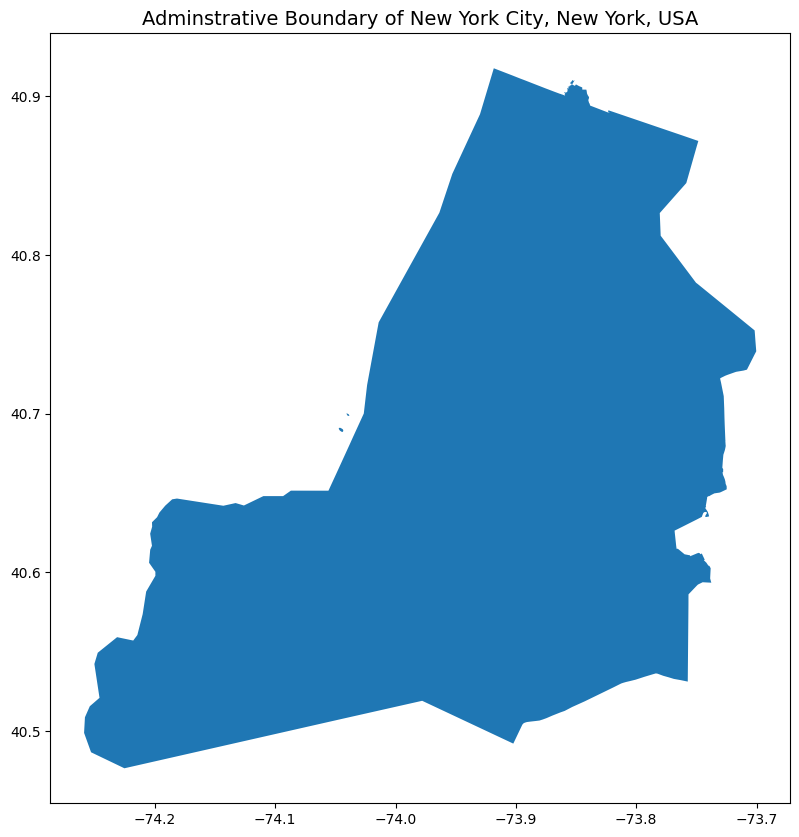

In [4]:
city = "New York City, New York, USA"
f,ax = plt.subplots(1,1, figsize= (10,10))
admin = ox.geocode_to_gdf(city)
ax.set_title(f"Adminstrative Boundary of {city}", fontsize = 14)
display(admin)
admin.plot(ax=ax)


In [7]:
Roadnet = ox.graph_from_polygon(admin.geometry.to_list()[0], network_type="drive") # Changed 'geomtery' to 'geometry'
nodes = Roadnet.number_of_nodes()
edges = Roadnet.number_of_edges()

In [8]:
print('Number of intersections:', nodes)
print('Number of road segments:', edges)

Number of intersections: 55305
Number of road segments: 139484


In [9]:
nodesgdf, edgesgdf = ox.graph_to_gdfs(Roadnet)

osmid        highway  \
u           v          key                                                     
39076461    274283981  0                             25161349       motorway   
            42854803   0                             25161578  motorway_link   
39076490    277672046  0                              5699971  motorway_link   
            277672005  0                           1014007069       motorway   
39076504    462124701  0      [618709517, 618709515, 5700693]  motorway_link   
...                                                       ...            ...   
12426968819 42491387   0    [276083320, 276083313, 279918418]    residential   
            42520650   0              [901356586, 1222625372]    residential   
12433053960 6509062985 0                           1343716931    residential   
            42859491   0                           1343716932    residential   
            42859494   0                           1343716929    residential   

                           lanes maxspeed                  name  oneway  ref  \
u           v          key                                                     
39076461    274283981  0       2   50 mph  Cross Island Parkway    True   CI   
            42854803   0     NaN      NaN                   NaN    True  NaN   
39076490    277672046  0     NaN      NaN                   NaN    True  NaN   
            277672005  0       3   50 mph  Cross Island Parkway    True   CI   
39076504    462124701  0       1      NaN                   NaN    True  NaN   
...                          ...      ...                   ...     ...  ...   
12426968819 42491387   0     NaN   20 mph          Blake Avenue   False  NaN   
            42520650   0     NaN   20 mph   Van Sinderen Avenue    True  NaN   
12433053960 6509062985 0     NaN      NaN          221st Street   False  NaN   
            42859491   0     NaN      NaN          221st Street   False  NaN   
            42859494   0     NaN      NaN          221st Street    True  NaN   

                           reversed      length  \
u           v          key                        
39076461    274283981  0      False  819.501666   
            42854803   0      False  268.144095   
39076490    277672046  0      False  259.674361   
            277672005  0      False  291.838695   
39076504    462124701  0      False  433.149850   
...                             ...         ...   
12426968819 42491387   0       True   83.035181   
            42520650   0      False  174.127601   
12433053960 6509062985 0      False   28.084523   
            42859491   0      False   45.086704   
            42859494   0      False   50.490782   

                                                                     geometry  \
u           v          key                                                      
39076461    274283981  0    LINESTRING (-73.79475 40.78635, -73.79462 40.7...   
            42854803   0    LINESTRING (-73.79475 40.78635, -73.79332 40.7...   
39076490    277672046  0    LINESTRING (-73.75709 40.76243, -73.75721 40.7...   
            277672005  0    LINESTRING (-73.75709 40.76243, -73.75741 40.7...   
39076504    462124701  0    LINESTRING (-73.74416 40.75347, -73.74453 40.7...   
...                                                                       ...   
12426968819 42491387   0    LINESTRING (-73.90127 40.66688, -73.90129 40.6...   
            42520650   0    LINESTRING (-73.90127 40.66688, -73.90125 40.6...   
12433053960 6509062985 0    LINESTRING (-73.73631 40.72423, -73.73599 40.7...   
            42859491   0    LINESTRING (-73.73631 40.72423, -73.73664 40.7...   
            42859494   0    LINESTRING (-73.73631 40.72423, -73.73616 40.7...   

                           bridge access tunnel width junction est_width  
u           v          key                                                
39076461    274283981  0      NaN    NaN    NaN   NaN      NaN       NaN  
            42854803   0      N

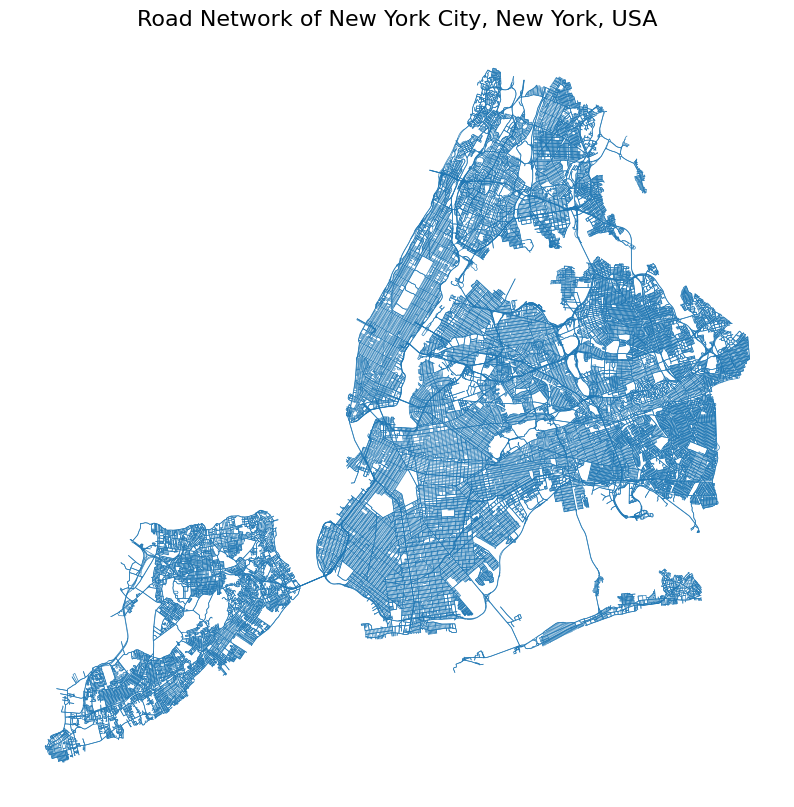

In [10]:
# Visualize the Road Network

f,ax = plt.subplots(1,1, figsize= (10,10))
edgesgdf.plot(ax= ax, linewidth =0.5, alpha =0.9)
ax.set_title(f"Road Network of {city}", fontsize = 16)
ax.axis('off')
display(edgesgdf)
plt.show()

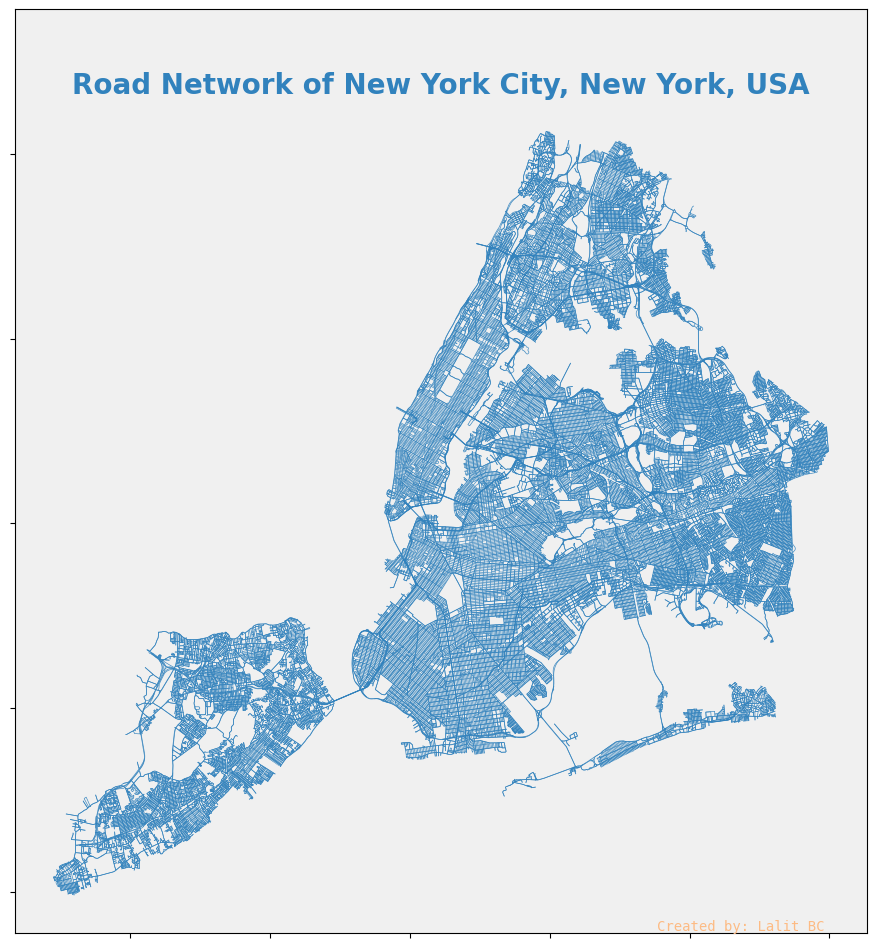

In [18]:
# Add Custom styles
f, ax = plt.subplots(1,1, figsize = (12,12))

color_palette = {'Neon': '#3182bd', 'Background': '#f0f0f0'}
edgesgdf.plot(ax=ax, color = color_palette['Neon'], linewidth=0.5, alpha =0.9)
ax.set_facecolor(color_palette['Background'])

# Remove ticks and labels for a clean neon look
for xlabel_i in ax.get_xticklabels():
    xlabel_i.set_visible(False)
for ylabel_i in ax.get_yticklabels():
    ylabel_i.set_visible(False)

for ticks in ax.xaxis.get_major_ticks():
    ticks.label1.set_visible(False)
for ticks in ax.yaxis.get_major_ticks():
    ticks.label1.set_visible(False)

ymin, ymax = plt.ylim()
extension = 0.1*(ymax-ymin)
ax.set_ylim(ymin, ymax+extension)
ax.set_title(f'Road Network of {city}', fontsize = 20, color = color_palette['Neon'], weight = 'bold', y= 0.9, family = 'sans-serif')
plt.text(0.95, 0, 'Created by: Lalit BC', color='#fdbb84', fontsize =10,
         transform=ax.transAxes, ha='right', va='bottom', family = 'monospace')
plt.savefig('raod_network_red.jpg', dpi =500, bbox_inches='tight', facecolor = color_palette['Background'])
# plt.savefig('raod_network_red.jpg', dpi =500, bbox_inches='tight', facecolor = color_palette['Background'])

plt.show()